<a href="https://colab.research.google.com/github/Code-tanisha/UPgrad-Python-Data-science-/blob/main/Google_playstore_CaseStudy_Cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd 
import os

In [2]:
from google.colab import files
uploaded = files.upload()

Saving googleplaystore_v2.csv to googleplaystore_v2.csv


In [3]:
inp = pd.read_csv('googleplaystore_v2.csv')
inp.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
inp.shape

(10841, 13)

In [5]:
inp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  float64
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), object(11)
memory usage: 1.1+ MB


**Now we will find the missing value in each column**

In [6]:
inp.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

Handling missing values for rating
 - ratings is the target variable
 
 - drop the records

In [7]:
inp1 = inp[-inp.Rating.isnull()]
inp1.shape

(9367, 13)

In [8]:
# now we will get 0 null values
inp1.Rating.isnull().sum()

0

In [9]:
inp1.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       4
Android Ver       3
dtype: int64

**Explore and understand the nulls for the column Anroid version**

In [10]:
inp1[inp1['Android Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.000000,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.000000,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,21516.529524,Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


**the above record - 'Life Made WI-Fi Touchscreen Photo Frame' is incorrectly entered for all the columns so we will intentify and drop it**

In [11]:
# Identify

inp1[(inp1['Android Ver'].isnull() & (inp1.Category == "1.9"))]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,21516.529524,Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [12]:
# Now we will exclude the above record with the negate condition(-)

inp1 = inp1[-(inp1['Android Ver'].isnull() & (inp1.Category == "1.9"))]

In [13]:
inp1[inp1['Android Ver'].isnull()]

# now we are left with 2 null values

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.0,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.0,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN


Now for the other 2 missing values that are categorical we will not drop thode we will computee then with the most common value


Now firstly we will find the most common value in anroid version

In [14]:
inp1['Android Ver'].mode()
# the most common value is 4.1 and up but the out put is not a string value so

0    4.1 and up
dtype: object

In [15]:
inp1['Android Ver'].mode()[0]

'4.1 and up'

In [16]:
inp1['Anroid Ver'] = inp1['Anroid Ver'].fillna(inp1['Android Ver'].mode()[0])

KeyError: ignored

In [17]:
inp1['Android Ver'].isnull().sum()

2

In [18]:
# Now we will look at the missing values in whole data frame
inp1.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       4
Android Ver       2
dtype: int64

**Missing Values in Current version**

In [19]:
inp1[inp1['Current Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
15,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.2,55,2700.0,"5,000+",Free,0,Everyone,Art & Design,"June 6, 2018",NaN,4.2 and up
1553,Market Update Helper,LIBRARIES_AND_DEMO,4.1,20145,11.0,"1,000,000+",Free,0,Everyone,Libraries & Demo,"February 12, 2013",NaN,1.5 and up
6322,Virtual DJ Sound Mixer,TOOLS,4.2,4010,8700.0,"500,000+",Free,0,Everyone,Tools,"May 10, 2017",NaN,4.0 and up
7333,Dots puzzle,FAMILY,4.0,179,14000.0,"50,000+",Paid,$0.99,Everyone,Puzzle,"April 18, 2018",NaN,4.0 and up


In [20]:
inp1['Current Ver'].mode()[0]

'Varies with device'

In [21]:
# Here also we will replace the missing values with the mode

inp1['Current Ver'] = inp1['Current Ver'].fillna(inp1['Current Ver'].mode()[0])


In [22]:
inp1['Current Ver'].isnull().sum()

0

In [23]:
inp1['Current Ver'].value_counts()

Varies with device    1419
1.0                    458
1.1                    195
1.2                    126
1.3                    120
                      ... 
5.06                     1
1009001                  1
8.0.0130                 1
1.0.3.1                  1
3.0.17                   1
Name: Current Ver, Length: 2638, dtype: int64

In [24]:
# Now we are left with 0 missing values
inp1.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       2
dtype: int64

**Now we will change the variables to the correct types**

In [25]:
inp1.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size              float64
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [26]:
inp1.head()

# Reviws should be numeric
# price should be numeric

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


**Price column**

In [27]:
inp1['Price'].value_counts()

# we are getting prices as optect becoz the non zero value is followed with $ symbol
# So what we will do is extet everything after the $ and then treat it as float

0         8719
$2.99      114
$0.99      107
$4.99       70
$1.99       59
          ... 
$1.29        1
$3.02        1
$2.50        1
$37.99       1
$15.46       1
Name: Price, Length: 73, dtype: int64

In [28]:
# now we will apply a condition ie. if x is 0 than we will do nothing and if x is not 0 then we will extract the 2nd element and that too in float
inp1['Price'] = inp1['Price'].apply(lambda x: 0 if x=="0" else float(x[1:]))

In [29]:
inp1['Price'].dtype

dtype('float64')

In [30]:
# $ sign is not present now
inp1['Price'].value_counts()

0.00      8719
2.99       114
0.99       107
4.99        70
1.99        59
          ... 
299.99       1
1.59         1
1.61         1
3.90         1
2.90         1
Name: Price, Length: 73, dtype: int64

**Now we will handle the reviews column**

In [31]:
# there are no issues here
inp1['Reviews'].value_counts()

2          83
3          78
5          74
4          74
1          67
           ..
25183       1
266402      1
22773       1
9235155     1
837842      1
Name: Reviews, Length: 5992, dtype: int64

In [32]:
# so we can directly convert it into integer
inp1['Reviews'] = inp1['Reviews'].astype("int32")
inp1['Reviews'].describe()

# now the data is converted correctly

count    9.366000e+03
mean     5.140498e+05
std      3.144042e+06
min      1.000000e+00
25%      1.862500e+02
50%      5.930500e+03
75%      8.153275e+04
max      7.815831e+07
Name: Reviews, dtype: float64

In [33]:
inp1.dtypes

App                object
Category           object
Rating            float64
Reviews             int32
Size              float64
Installs           object
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

**Now we will handle Install column**

In [41]:
inp1['Installs'].head()

# So we can see that that commas, + sign is making it object type

0       10000
1      500000
2     5000000
3    50000000
4      100000
Name: Installs, dtype: int32

In [42]:
inp1['Installs'] = inp1['Installs'].str.replace(",", "")
inp1['Installs'] = inp1['Installs'].str.replace("+", "")

AttributeError: ignored

In [43]:
inp1['Installs'] = inp1['Installs'].astype("int32")

In [44]:
inp1['Installs'].head()

0       10000
1      500000
2     5000000
3    50000000
4      100000
Name: Installs, dtype: int32

In [45]:
inp1.dtypes

App                object
Category           object
Rating            float64
Reviews             int32
Size              float64
Installs            int32
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

## **SANITY CHECKS**

In [46]:
inp1['Rating'].describe()

count    9366.000000
mean        4.191757
std         0.515219
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

**Reviews should be <= installs**

In [47]:
# now we will check how many records do no satisfy able records

inp1[(inp1['Reviews'] > inp1['Installs'])].shape

(7, 13)

In [48]:
inp1[(inp1['Reviews'] > inp1['Installs'])]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2454,KBA-EZ Health Guide,MEDICAL,5.0,4,25000.000000,1,Free,0.00,Everyone,Medical,"August 2, 2018",1.0.72,4.0.3 and up
4663,Alarmy (Sleep If U Can) - Pro,LIFESTYLE,4.8,10249,21516.529524,10000,Paid,2.49,Everyone,Lifestyle,"July 30, 2018",Varies with device,Varies with device
5917,Ra Ga Ba,GAME,5.0,2,20000.000000,1,Paid,1.49,Everyone,Arcade,"February 8, 2017",1.0.4,2.3 and up
6700,Brick Breaker BR,GAME,5.0,7,19000.000000,5,Free,0.00,Everyone,Arcade,"July 23, 2018",1.0,4.1 and up
7402,Trovami se ci riesci,GAME,5.0,11,6100.000000,10,Free,0.00,Everyone,Arcade,"March 11, 2017",0.1,2.3 and up
8591,DN Blog,SOCIAL,5.0,20,4200.000000,10,Free,0.00,Teen,Social,"July 23, 2018",1.0,4.0 and up
10697,Mu.F.O.,GAME,5.0,2,16000.000000,1,Paid,0.99,Everyone,Arcade,"March 3, 2017",1.0,2.3 and up


Avove records are not accurate as they satisfy the condition.

So we will drop these records

In [49]:
# here we will only store those values which do not satisfy above condition
inp1 = inp1[(inp1['Reviews'] <= inp1['Installs'])]

**the next check is the price should not be greater than zero for free apps**

In [50]:
inp1[(inp1['Type']=='Free') & (inp1['Price']>0)]

# No records that satisfies above condition

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


### **Identifying and handling outliers/extreme values**

In [51]:
import matplotlib.pyplot as plt
#%matplotlib inline

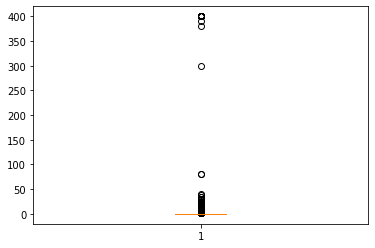

In [52]:
# visualize box plot
plt.boxplot(inp1.Price)

plt.show()

Checking out the records with price more than 200$

In [62]:
inp1[inp1['Price'] > 200]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4197,most expensive app (H),FAMILY,4.3,6,1500.0,100,Paid,399.99,Everyone,Entertainment,"July 16, 2018",1.0,7.0 and up
4362,💎 I'm rich,LIFESTYLE,3.8,718,26000.0,10000,Paid,399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7300.0,10000,Paid,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up
5351,I am rich,LIFESTYLE,3.8,3547,1800.0,100000,Paid,399.99,Everyone,Lifestyle,"January 12, 2018",2.0,4.0.3 and up
5354,I am Rich Plus,FAMILY,4.0,856,8700.0,10000,Paid,399.99,Everyone,Entertainment,"May 19, 2018",3.0,4.4 and up
5355,I am rich VIP,LIFESTYLE,3.8,411,2600.0,10000,Paid,299.99,Everyone,Lifestyle,"July 21, 2018",1.1.1,4.3 and up
5356,I Am Rich Premium,FINANCE,4.1,1867,4700.0,50000,Paid,399.99,Everyone,Finance,"November 12, 2017",1.6,4.0 and up
5357,I am extremely Rich,LIFESTYLE,2.9,41,2900.0,1000,Paid,379.99,Everyone,Lifestyle,"July 1, 2018",1.0,4.0 and up
5358,I am Rich!,FINANCE,3.8,93,22000.0,1000,Paid,399.99,Everyone,Finance,"December 11, 2017",1.0,4.1 and up
5359,I am rich(premium),FINANCE,3.5,472,965.0,5000,Paid,399.99,Everyone,Finance,"May 1, 2017",3.4,4.4 and up


In [54]:
inp1 = inp1[inp1['Price'] > 200]


In [55]:
inp1['Price'].describe()

count     15.000000
mean     391.324000
std       25.875398
min      299.990000
25%      399.990000
50%      399.990000
75%      399.990000
max      400.000000
Name: Price, dtype: float64

In [56]:
inp1[inp1.Price].Price.plot.box()

KeyError: ignored

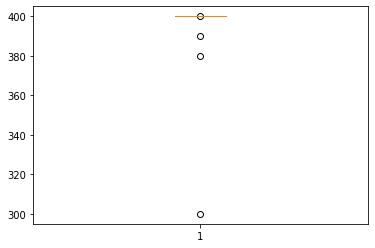

In [57]:
# visualize box plot
plt.boxplot(inp1.Price)

plt.show()

**Reviews - How are the reviews distributed**

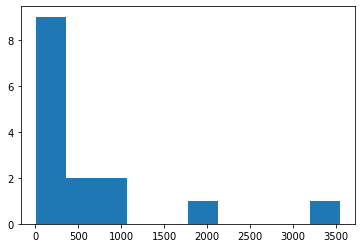

In [58]:
# Histogram for the reviews 

plt.hist(inp1['Reviews'])
plt.show()

{'boxes': [<matplotlib.lines.Line2D at 0x7f7541be09d0>],
 'caps': [<matplotlib.lines.Line2D at 0x7f7541be6a10>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f754645ae10>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f7541bed510>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f7541be0f50>,
  <matplotlib.lines.Line2D at 0x7f7541be64d0>]}

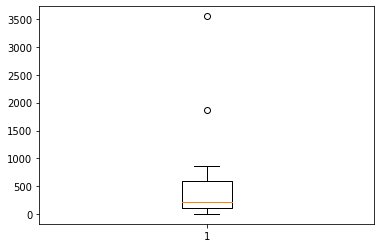

In [59]:
plt.boxplot(inp1['Reviews'])

In [60]:
# Checking out the records with more than 10000000 views

inp1[inp1['Reviews']>10000000]

# no records are found

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


### Question 

Calculate the IQR of the Installs column.

In [64]:
inp1['Installs'].describe()

count        15.000000
mean      14606.666667
std       26563.521353
min         100.000000
25%        1000.000000
50%        5000.000000
75%       10000.000000
max      100000.000000
Name: Installs, dtype: float64